# Regression:-

In [1]:
# 1. Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('house_price_regression_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [3]:
# 2. EDA (Exploratory Data Analysis)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [4]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [5]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

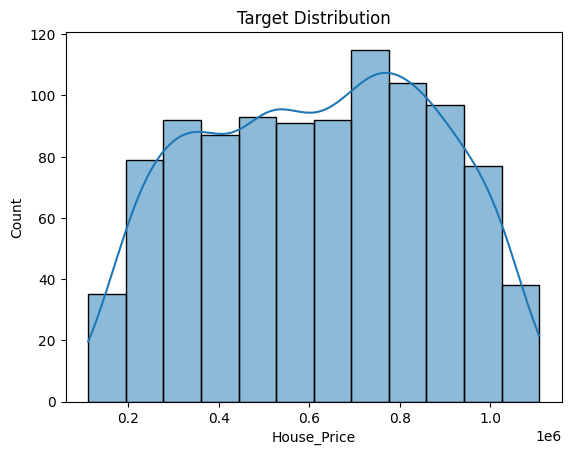

In [6]:
# Distribution of target
sns.histplot(df['House_Price'], kde=True)
plt.title("Target Distribution")
plt.show()

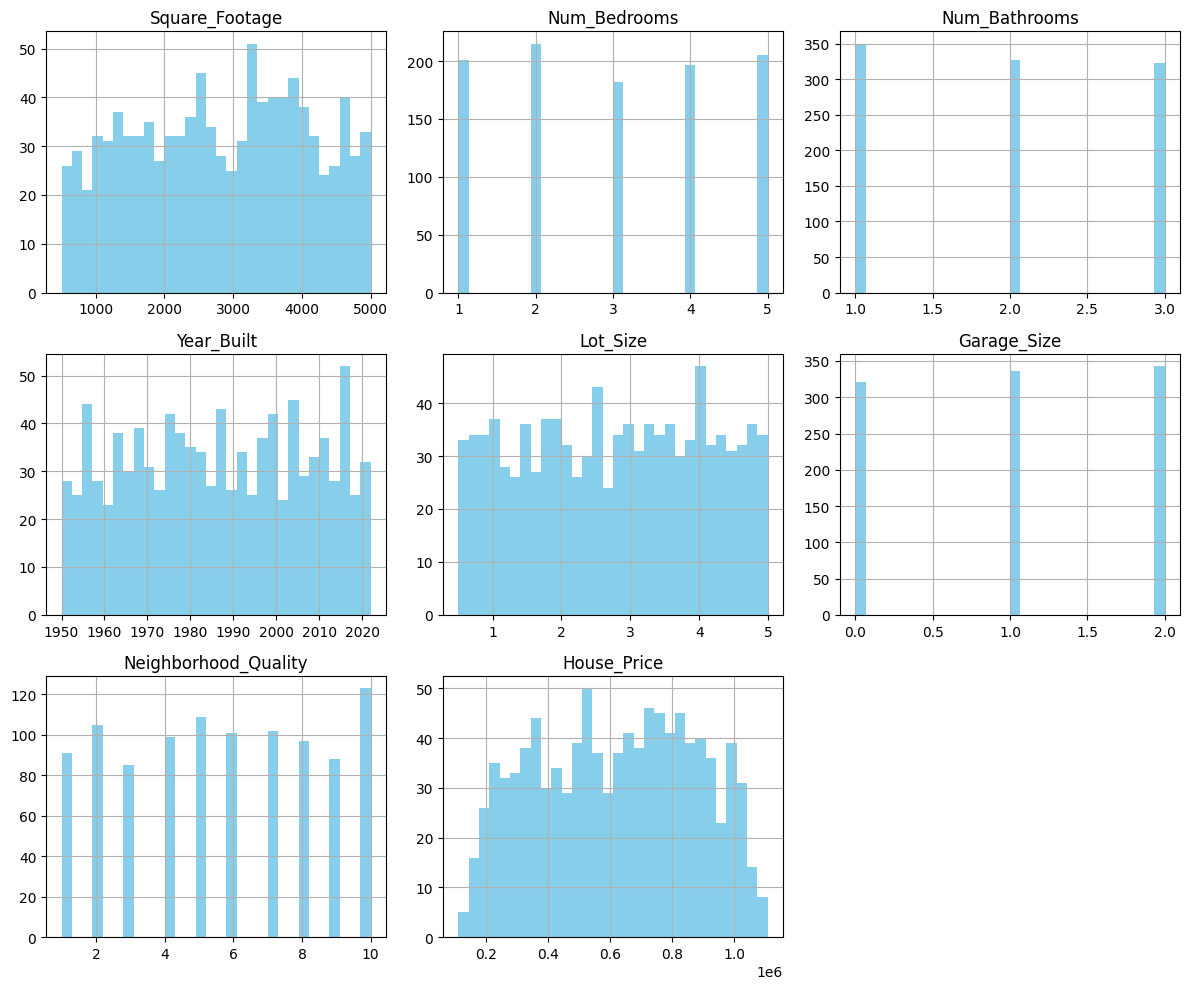

In [7]:
# Histograms for all numeric features
df.hist(bins=30, figsize=(12, 10), color="skyblue")
plt.tight_layout()
plt.show()

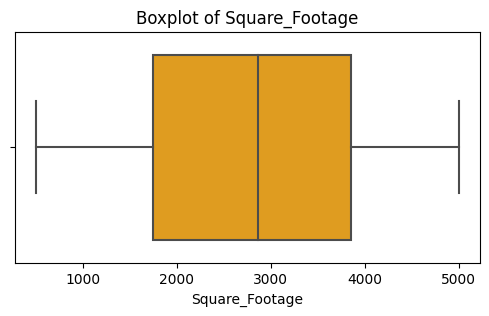

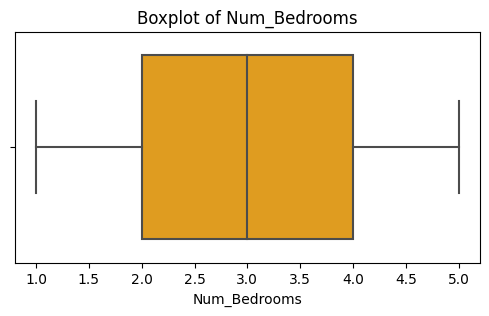

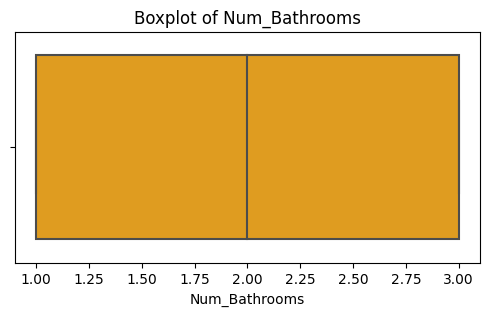

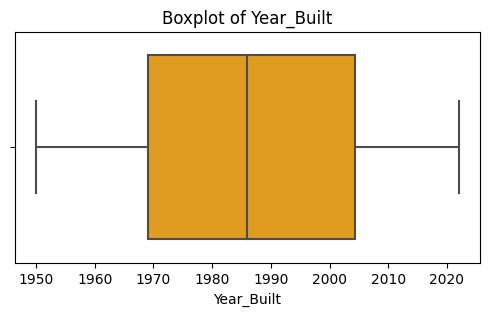

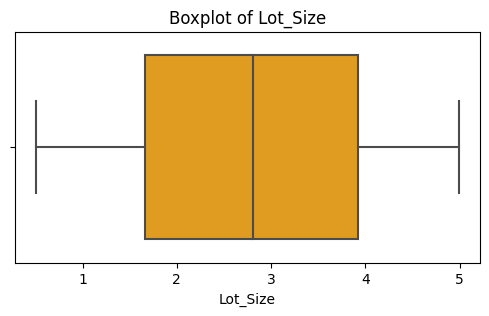

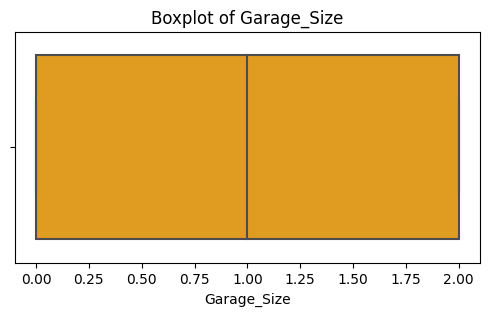

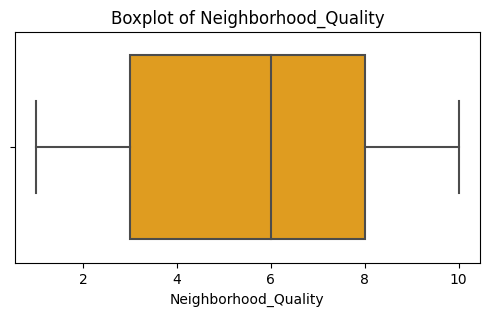

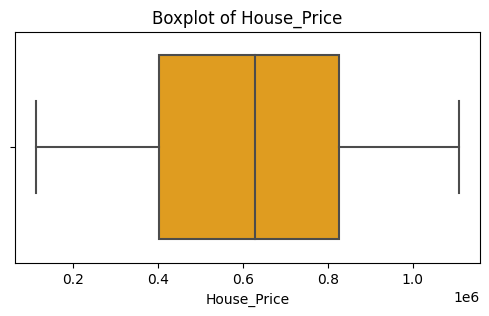

In [8]:
# Boxplots to check for outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col, color="orange")
    plt.title(f"Boxplot of {col}")
    plt.show()

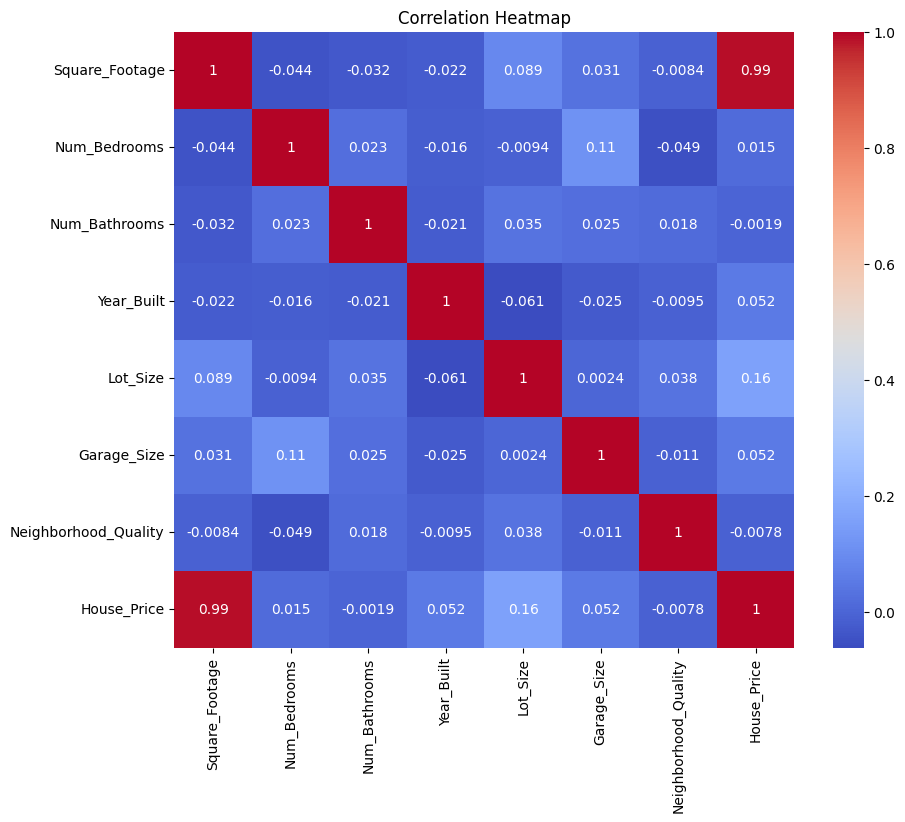

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

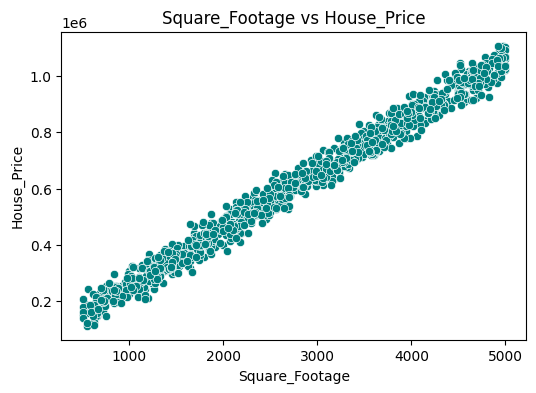

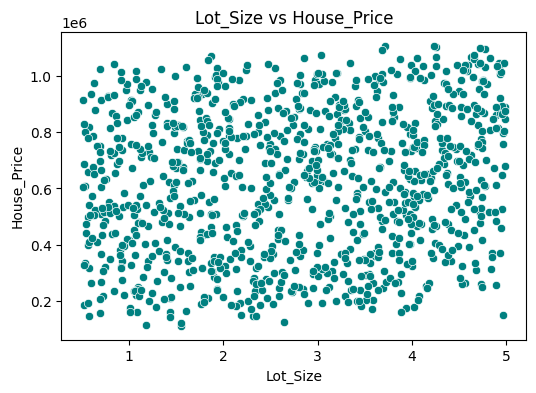

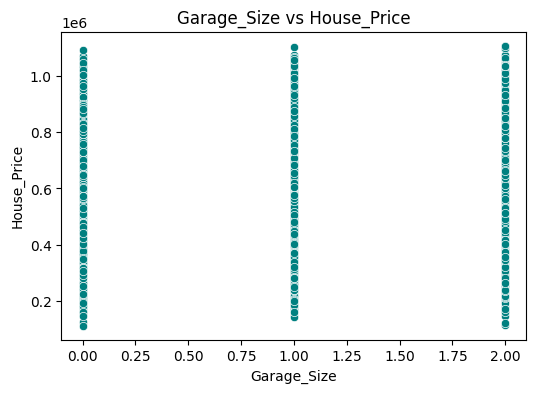

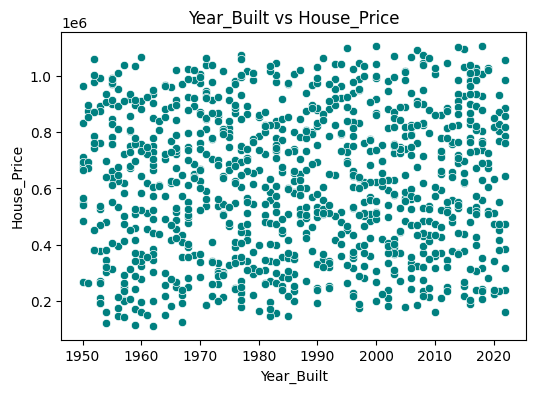

In [10]:
# Scatter plots for most correlated features with target
corr_matrix = df.corr(numeric_only=True)
strong_corrs = corr_matrix['House_Price'].abs().sort_values(ascending=False)[1:5]
for col in strong_corrs.index:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='House_Price', color='teal')
    plt.title(f"{col} vs House_Price")
    plt.show()

In [11]:
# 3. Full Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# Features & Target
X = df.drop('House_Price', axis=1)
y = df['House_Price']

In [13]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

In [15]:
# 4. Models & Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

In [17]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} | CV R^2 Score: {scores.mean():.4f}")

Linear Regression | CV R^2 Score: 0.9985
Decision Tree | CV R^2 Score: 0.9836
Random Forest | CV R^2 Score: 0.9923
SVR | CV R^2 Score: -0.0075
KNN | CV R^2 Score: 0.8930


In [18]:
# 5. Hyperparameter Tuning (KNN)
from sklearn.model_selection import GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')
grid_knn.fit(X_train, y_train)
print("Best KNN Parameters:", grid_knn.best_params_)

Best KNN Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [19]:
# 6. Final Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

final_model = grid_knn.best_estimator_
y_pred = final_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

MSE: 76820.91644573033
MAE: 60876.61742374497
R^2 Score: 0.9027105542934813


# Classification:-

In [20]:
# 1. Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
# Load CSV
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
# 2. Preprocessing
df=df.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
df

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,male,22.0,1,0,0
1,1,female,38.0,1,0,1
2,3,female,26.0,0,0,1
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0
...,...,...,...,...,...,...
886,2,male,27.0,0,0,0
887,1,female,19.0,0,0,1
888,3,female,NaN,1,2,0
889,1,male,26.0,0,0,1


In [23]:
# 3. EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [24]:
df.describe()

,Pclass,Age,SibSp,Parch,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,0.383838
std,0.836071,14.526497,1.102743,0.806057,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [25]:
# find null values
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Survived      0
dtype: int64

In [26]:
# Fill missing value
df['Age'].fillna(df['Age'].median(), inplace=True)

In [27]:
# Encode categorical columns
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,1,22.0,1,0,0
1,1,0,38.0,1,0,1
2,3,0,26.0,0,0,1
3,1,0,35.0,1,0,1
4,3,1,35.0,0,0,0
...,...,...,...,...,...,...
886,2,1,27.0,0,0,0
887,1,0,19.0,0,0,1
888,3,0,28.0,1,2,0
889,1,1,26.0,0,0,1


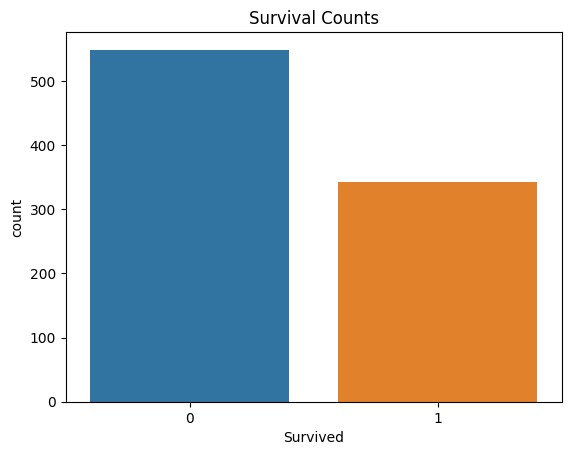

In [28]:
# Target distribution
sns.countplot(data=df, x='Survived')
plt.title("Survival Counts")
plt.show()

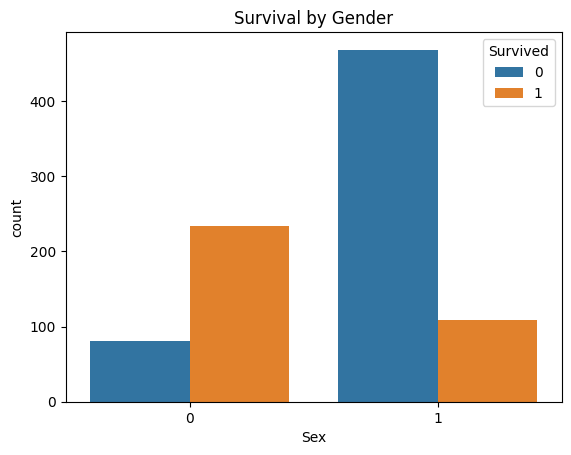

In [29]:
# Gender vs Survival
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

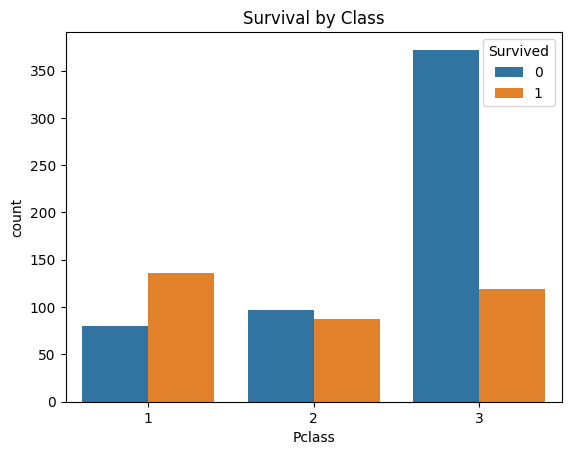

In [30]:
# Class vs Survival
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()


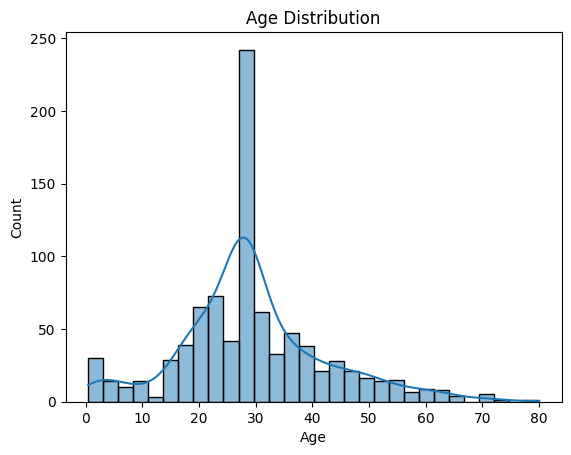

In [31]:
# Age Distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

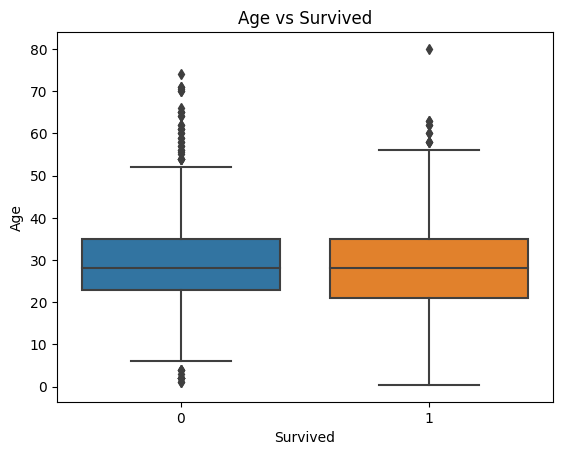

In [32]:
# Boxplot Age vs Survived
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age vs Survived")
plt.show()

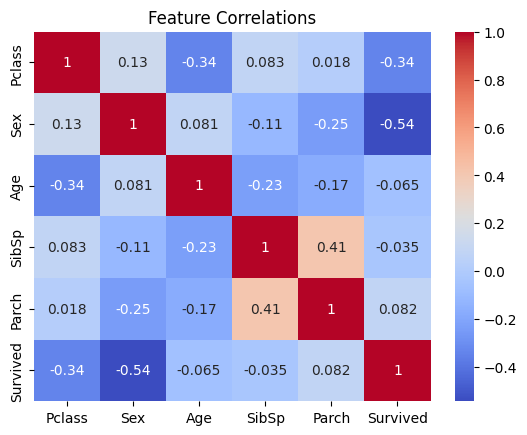

In [33]:
# Correlation Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

In [34]:
# Features & Target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [35]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 5. Models & Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [39]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} | CV Accuracy: {scores.mean():.4f}")

Logistic Regression | CV Accuracy: 0.7865
KNN | CV Accuracy: 0.8005
Decision Tree | CV Accuracy: 0.7851
Random Forest | CV Accuracy: 0.8061
SVM | CV Accuracy: 0.8230


In [40]:
# 6. Hyperparameter Tuning (SVM)
from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), param_grid_svm, cv=5)
svm_grid.fit(X_train, y_train)
print("\nSVM Best Parameters:", svm_grid.best_params_)


SVM Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [41]:
# 7. Final Evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svm_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 13]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

